## Beispielfunktion: $f(x)=x^2-x-1$, $x_0=0$

## Newton Verfahren

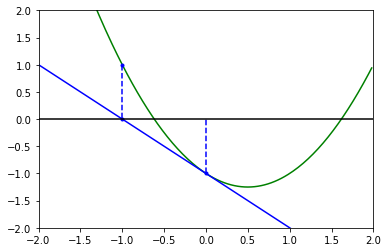

In [55]:
import math
import numpy as np              # array Funktionen
import matplotlib.pyplot as plt # plot Funktionen

x = np.arange(-2, 2, 0.02) # x-Werte
y = x**2-x-1               # Zugehörige y-Werte der Wertetabelle
dy= 2*x-1
plt.plot(x, y, 'g-')       # Plot der Wertetabelle

x0=0
x1=x0-(x0**2-x0-1)/(2*x0-1)
dy0 = -1
yt  = -1*(x)-1
plt.plot(x, yt, 'b-')      # Plot der Wertetabelle
plt.plot([x0], [x0**2-x0-1], 'b.')
plt.plot([x0, x0], [x0**2-x0-1, 0], 'b--') 

plt.plot([x1], [0], 'b.')
plt.plot([x1], [x1**2-x1-1], 'b.')
plt.plot([x1, x1], [x1**2-x1-1, 0], 'b--') 
#plt.plot( [0, 0], [-2, 2], 'k-') 
plt.plot([-2, 2], [0,  0], 'k-') 
plt.axis([-2, 2, -2, 2])
plt.show()

In [59]:
import math

i    = 0
x_i  = 0.0
here = math.inf
a  = 0.5*(1-5**0.5) # Nullstelle
f  = lambda x: x**2-x-1
r  = list()
print("i=", "\tx_i=", "\t\t\tf_i=", "\t\t\tr_i=")
while (math.fabs(f(x_i)) > 1e-6):
    df   = 2*x_i-x_i-1
    x_ii = x_i - f(x_i)/df
    r.append(math.fabs((x_ii-a)/(x_i-a)) if math.fabs(x_i-a) > 1e-16 else math.inf)
    print(("%d" % (i)), ("\t%0.16f" % (x_i)), ("\t%0.16f" % (f(x_i))), ("\t%0.16f" % (r[-1])))
    last = here
    here = math.fabs(x_ii-x_i)
    x_i  = x_ii
    i   += 1
    
    if (here >= last): # (x_i) divergiert
        break

#o = [math.log(r[i])/math.log(r[i-1]) if r[i-1]>0 and math.log(r[i-1])!=0.0 else 0 for i in range(1, len(r))]
print(r)

i= 	x_i= 			f_i= 			r_i=
0 	0.0000000000000000 	-1.0000000000000000 	0.6180339887498947
1 	-1.0000000000000000 	1.0000000000000000 	0.3090169943749476
2 	-0.5000000000000000 	-0.2500000000000000 	0.4120226591665956
3 	-0.6666666666666666 	0.1111111111111112 	0.3708203932499415
4 	-0.5999999999999999 	-0.0400000000000003 	0.3862712429686773
5 	-0.6250000000000000 	0.0156250000000000 	0.3803286084614796
6 	-0.6153846153846154 	-0.0059171597633135 	0.3825924692261100
7 	-0.6190476190476191 	0.0022675736961451 	0.3817268754043872
8 	-0.6176470588235294 	-0.0008650519031141 	0.3820573748633614
9 	-0.6181818181818182 	0.0003305785123966 	0.3819311166432957
10 	-0.6179775280898877 	-0.0001262466860243 	0.3819793402685869
11 	-0.6180555555555556 	0.0000482253086420 	0.3819609200863413
12 	-0.6180257510729614 	-0.0000184199377404 	0.3819679559015968
13 	-0.6180371352785146 	0.0000070358617874 	0.3819652684567305
14 	-0.6180327868852460 	-0.0000026874496102 	0.3819662949007375
15 	-0.61803444782

### Abbruchbedingung

Funktionswert 
$$ | f(x_i) | \leq \text{1e-6} $$

### Messung der Konvergenzrate

Fehler gleich Abstand zur Nullstelle: $e_i := |x_i-a|$. Vergleichen aufeinanderfolgende Fehler $e_i$, 
$e_{i} = r_{i}\cdot e_{i-1}$.

Dann *Konvergenzfaktor*, *Konvergenzrate* $r_i$: 
$$ r_{i} = \frac{e_{i}}{e_{i-1}} $$

Dann *Konvergenzordnung* $o_i$: 
$$ e_{i} = e_{i-1}^{o_i}, o_i = \frac{\log e_i}{\log e_{i-1}} $$

## Regula Falsi

In [58]:
import math

x_i  = 0.0
x_ii = -1.0
a  = 0.5*(1-5**0.5) # Nullstelle
f  = lambda x: x**2-x-1
r  = list()
print("i=", "\tx_i=", "\t\t\tf_i=", "\t\t\tr_i=")
i = 0
while (math.fabs(f(x_i)) > 1e-6):
    assert(f(x_i)*f(x_ii) <= 0.0) # f(x_i), f(x_ii) verschiedenes Vorzeichen, also Intervall enthält Null
    df = (f(x_ii)-f(x_i))/(x_ii-x_i)
    # f(x_i)+df*(x-x_i) == 0
    x_new = x_i-f(x_i)/df
    if f(x_new)*f(x_i) >= 0.0: # f(x_new), f(x_i) gleiches Vorzeichen
        x_i = x_new
    else:                      # f(x_new), f(x_ii) gleiches Vorzeichen
        x_ii = x_new
        
    r.append(math.fabs((x_ii-a)/(x_i-a)) if math.fabs(x_i-a) > 1e-16 else math.inf)
    print(("%d" % (i)), ("\t%0.16f" % (x_i)), ("\t%0.16f" % (f(x_i))), ("\t%0.16f" % (r[-1])))
    i += 1

#o = [math.log(r[i])/math.log(r[i-1]) if r[i-1]>0 and math.log(r[i-1])!=0.0 else 0 for i in range(1, len(r))]
print(r)

i= 	x_i= 			f_i= 			r_i=
0 	-0.5000000000000000 	-0.2500000000000000 	3.2360679774997876
1 	-0.6000000000000000 	-0.0400000000000000 	21.1803398874988567
2 	-0.6153846153846154 	-0.0059171597633135 	144.1722092687420513
3 	-0.6176470588235294 	-0.0008650519031141 	987.1710230273814659
4 	-0.6179775280898876 	-0.0001262466860246 	6765.1708499452906835
5 	-0.6180257510729613 	-0.0000184199377408 	46368.1708240762673086
6 	-0.6180327868852459 	-0.0000026874496104 	317811.1708002091618255
7 	-0.6180338134001252 	-0.0000003920939740 	2178309.1696905475109816
[3.2360679774997876, 21.180339887498857, 144.17220926874205, 987.1710230273815, 6765.170849945291, 46368.17082407627, 317811.17080020916, 2178309.1696905475]


Wir sehen: 

Regula Falsi konvergiert hier sehr viel schneller. Es wird die Hälfte der Iterationen bis zu Funktionswert kleiner gleich $\text{1e-6}$ benötigt.